# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [1]:
import numpy as np

### Simulation du lancé de dé

In [2]:
def Roll():
    return int(np.random.choice([1,2,3,4,5,6],replace=True))#replce= si on met false il ne reperte pas un valeur deja choisi , true il donne tjrs tous les valeurs

In [3]:
Roll()

2

In [4]:
for i in range(15):#on va lancé le dé 15 fois et a chaque lancé on note la resultat obtenue
    print(Roll())

1
3
5
1
1
2
4
2
6
4
3
3
4
6
5


In [5]:
POS=0 #pion dans le prison
NBCOUP=0#initialiser nombre de coups à 0 
CIBLE=20#on veut arriver à la case num 20 
temp=Roll()
NBCOUP+=1#a chaque lancé on incremente le nombre de coups 

if temp == 6:
    POS=1 #si on obitient 6 au premier lancé , on sort du prison 
    print(NBCOUP,temp,POS)
else:
    print(NBCOUP,temp,POS)
    while temp!=6:#tant que le de obtenu different de 6 
        temp=Roll()#on lance encore une fois
        NBCOUP+=1
        if temp==6:
            POS=1
            print(NBCOUP,temp,POS)
            break
        print(NBCOUP,temp,POS)
print(f'le pion est sorti apres{NBCOUP} Coups')

#c est le code de sortir du prision 
#2eme partie : vers le cible 

while POS<CIBLE:#tant que on arrive pas au cible 
    temp=Roll()
    NBCOUP+=1
    if POS+temp>CIBLE:
       
        print(NBCOUP,temp,POS)
    elif POS+temp==CIBLE:
        POS=CIBLE
        print(NBCOUP,temp,POS)
    else:
        
        POS+=temp
        print(NBCOUP,temp,POS)
print(f'le jeu est terminé apres {NBCOUP} Coups')
#Cest le script 


1 6 1
le pion est sorti apres1 Coups
2 6 7
3 2 9
4 2 11
5 2 13
6 3 16
7 3 19
8 5 19
9 2 19
10 3 19
11 6 19
12 2 19
13 4 19
14 4 19
15 4 19
16 6 19
17 2 19
18 3 19
19 1 20
le jeu est terminé apres 19 Coups


In [6]:
def LUDO(CIBLE):
    POS=0 #pion dans le prison
    NBCOUP=0
    CIBLE=20
    temp=Roll()
    NBCOUP+=1

    if temp == 6:
        POS=1
        #print(NBCOUP,temp,POS)
    else:
        #print(NBCOUP,temp,POS)
        while temp!=6:
            temp=Roll()
            NBCOUP+=1
            if temp==6:
                POS=1
                #print(NBCOUP,temp,POS)
                break
            #print(NBCOUP,temp,POS)
    #print(f'le pion est sorti apres{NBCOUP} Coups')

    #c est le code de sortir du prision 
    #2eme partie : vers le cible 

    while POS<CIBLE:
        temp=Roll()
        NBCOUP+=1
        if POS+temp>CIBLE:
            pass #instruction vide
            #print(NBCOUP,temp,POS)
        elif POS+temp==CIBLE:
            POS=CIBLE
            #print(NBCOUP,temp,POS)
        else:
            
            POS+=temp
            #print(NBCOUP,temp,POS)
    #print(f'le jeu est terminé apres {NBCOUP} Coups')
    return(NBCOUP)

In [7]:
LUDO(20)

25

In [8]:
sum([LUDO(20) for i in range(10_000)])/10_000


16.2046

In [9]:
cib=[20,25,30,35,40,45]
moy=[sum([LUDO(c) for i in range(10_000)])/10_000 for c in cib]

In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\fessi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


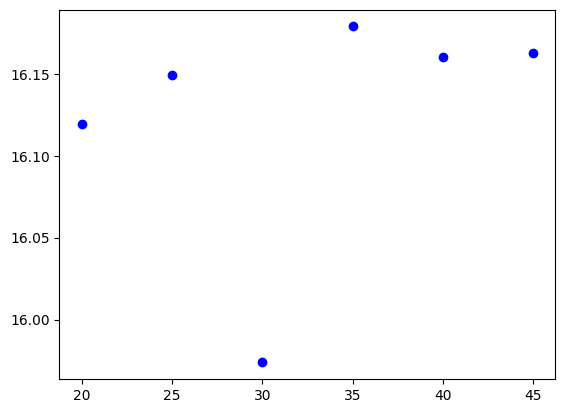

In [11]:
import matplotlib.pyplot as plt

plt.plot(cib,moy,'ob')
plt.show()

In [12]:
pip install scipy 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\fessi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
from scipy import stats 
slope , intercept , r_value , p_value , std_err=stats.linregress(cib,moy)


In [14]:
a,b=slope,intercept
print(a,b)

0.002606857142857158 16.039377142857145


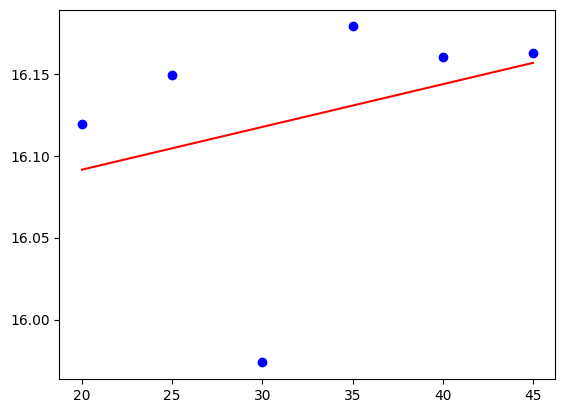

In [15]:
plt.plot(cib,moy,'ob')
x=np.linspace(20,45,1001)#intervalle entre 20et 45 
y=a*x+b#x taille de table lubo
plt.plot(x,y,'-r')#formule replace directement dans simulation 
plt.show()

### Compléter le code et commenter

In [16]:
A=0
NA=0
S=10
c=0
while (A<S) :
    pass

KeyboardInterrupt: 

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [ ]:
def sim(S):
    A=0
    NA=0
    c=0
    while (A<S) :
        pass
    return c
    

In [ ]:
sim(20)

13

### Simulation de $10^5$  scénario 

In [ ]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [ ]:
ESP=Freq.sum()/10**5

16.17253

In [ ]:
x=list(range(10,20))

In [ ]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [ ]:
import matplotlib.pyplot as plt

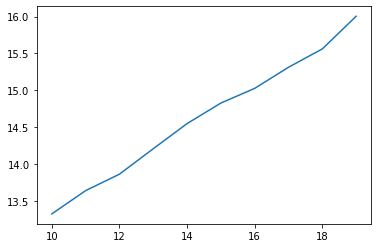

In [ ]:
plt.plot(x,y)

In [ ]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [ ]:
slope

0.28871527272727254

In [ ]:
intercept


10.443562545454547